In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [67]:
library(openxlsx)

data<- read.xlsx("./res/CI-CTR/bulk/25-mRNA_FPKM.genename.xlsx", sheet = 1)

head(data,2)

overla = read.table('./overlap.txt',header =T)

library(dplyr)

expr = data %>%  dplyr::filter(Gene_name %in%  overla$GeneName) %>%  tibble::column_to_rownames(.,'Gene_name') %>%  t()

# rownames(expr)



# Group = c(rep('con',19),rep('CI',16))

# colnames(expr) = gsub('-','.',colnames(expr))

# colnames(expr)



# set.seed(1234)

# expr = as.data.frame(apply(expr,2,as.numeric))

# expr3 = as.data.frame(cbind(Group,expr))

# expr3$Group = ifelse(expr3$Group == 'CI',1,0)

# expr3$Group = as.factor(expr3$Group)

#  model.gene =  c('FAM200B','BCL2A1','IGJ','TXN')

# expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

# dim(expr4)

# head(expr4,4)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI16,CI1,CI2,CI3,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZNF480,3.046852,2.959276,1.924806,2.086426,2.358436,2.745877,2.273106,3.353977,2.609238,...,5.532627,2.837813,4.141639,4.735136,6.489764,2.851674,3.680329,7.985714,4.003843,2.993553
2,ZNF354A,2.455682,2.209675,1.816189,2.385620,3.191194,3.338612,2.912866,3.386982,3.372144,...,4.964052,5.852160,2.514873,5.180209,5.847872,4.679571,3.423737,11.670074,4.470493,4.790598


In [69]:
da2 = expr[, c('FAM200B','BCL2A1','IGJ','TXN')]

In [72]:
da2 = da2 %>% as.data.frame() %>%  tibble::rownames_to_column(.,'sample')

In [73]:
head(da2,2)

,sample,FAM200B,BCL2A1,IGJ,TXN
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C10,3.180684,11.13562,16.57097,7.650115
2,C11,4.212774,20.99854,15.63976,10.409828


In [74]:
da2$sample

[1] "C10"  "C11"  "C12"  "C13"  "C14"  "C15"  "C16"  "C17"  "C18"  "C19" 
[11] "C1"   "C2"   "C3"   "C4"   "C5"   "C6"   "C7"   "C8"   "C9"   "CI10"
[21] "CI11" "CI12" "CI13" "CI14" "CI15" "CI16" "CI1"  "CI2"  "CI3"  "CI4" 
[31] "CI5"  "CI6"  "CI7"  "CI8"  "CI9"

In [75]:
da2$Group = c(rep(0,19),rep(1,16))

In [77]:
da2$Group = as.factor(da2$Group)

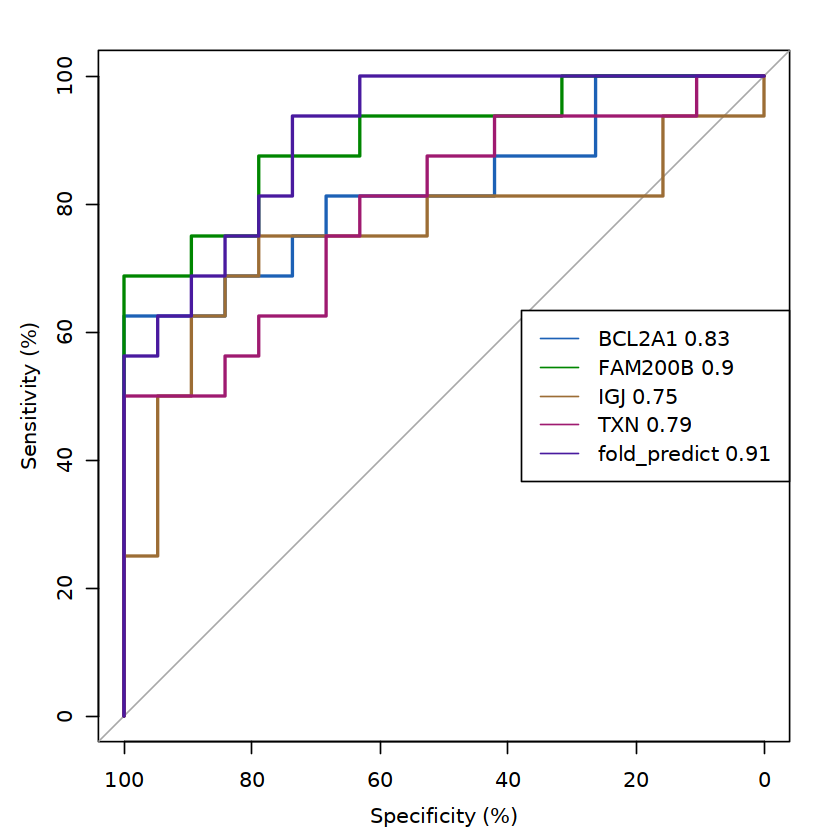

In [78]:
data = da2[,c('Group','FAM200B','BCL2A1','IGJ','TXN')]

fold_pre <- glm(Group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

library(pROC)
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)

In [79]:
cli74 = read.table('./sample35.cli.txt',header =T,sep = '\t') 

In [80]:
da4 = da2 %>% dplyr::filter(sample %in% cli74$sample)

In [81]:
da5 = merge(da4,cli74,by = 'sample')
dat6 = da5[,c('group','sex','age','BMI','FAM200B','BCL2A1','IGJ','TXN')]

In [83]:
dat6$group = ifelse(dat6$group == 'CTR',0,1)

In [85]:
dat6$group = as.factor(dat6$group)

In [96]:
fold_pre <- glm(group~sex+age+BMI,data=dat6,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=dat6)
library(pROC)
# rocobj1 <- plot.roc(dat6$group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
# rocobj2 <- lines.roc(dat6$group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
# rocobj3 <- lines.roc(dat6$group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
# rocobj4 <- lines.roc(dat6$group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(dat6$group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0(
    # "BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
    #                            paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
    #                            paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
    #                            paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)

ERROR: Error in parse(text = x, srcfile = src): <text>:16:0: unexpected end of input
14:                                paste0("fold_predict ", round(rocobj5$auc/100,digits = 2)),
15:        col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)
   ^


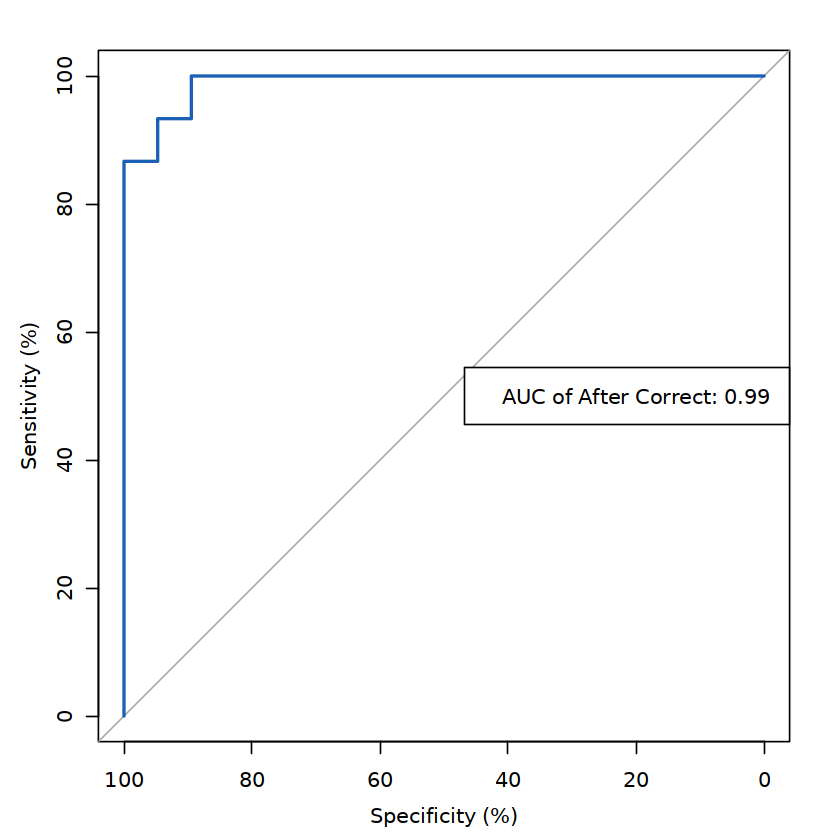

In [107]:
rocobj1 <- plot.roc(dat6$group,fold_predict,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
legend("right", legend="AUC of After Correct: 0.99", col=c("#491A9F"))

In [108]:
pdf('./fig/ROC-vali-QC.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(dat6$group,fold_predict,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
legend("right", legend="AUC of After Correct: 0.99", col=c("#491A9F"))
dev.off()

png 
  2